In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
data = pd.read_csv("datasets/regression-data-set.csv")
x = np.array(data["x"])
y = np.array(data["y"])

In [47]:
# part (a) and (b) 

# do train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y)

# function to return y value/values
def curve(x, a, b, c, d):
    y =  a + b * np.cos(c * x + d)
    return y

# "Fit the data using the training set and scipy.optimize.curve fit"
parameters, M = curve_fit(curve, x_train, y_train) # returns 4 parameters a b c d
parameters

array([ 3.07919287,  0.18449584,  1.01279985, -0.16743406])

In [48]:
# part (C)

# Calculate the MSE with the optimized parameters on the test set.

y_predicted = curve(x_test, *parameters) # parameters have a, b, c, d
mse_cosine = mean_squared_error(y_test, y_predicted)
print(y_predicted) 
print(mse_cosine)

[3.02790297 3.22129477 2.92386531 2.98134854 3.10342168 3.10642325
 2.90244752 2.91263594 3.10041357 2.89708452 3.26361909 3.0228931
 3.05346241 2.92431193 3.19699678 3.0308215  2.97850872 3.24639608
 3.24509228 3.26105204 3.19931362 2.97879202 2.93612915 2.95402789
 2.91045048]
0.0028556902530326254


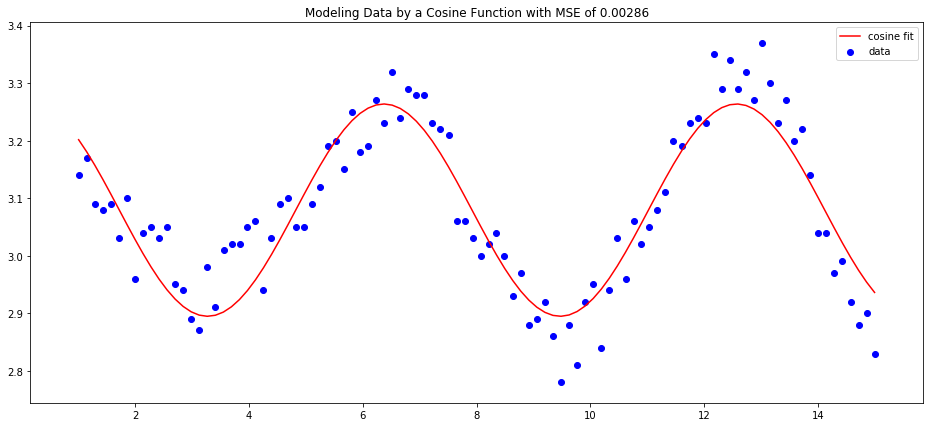

In [49]:
# graph 

x_val = np.linspace(x.min(), x.max(), len(x))
y_val = curve(x_val, *parameters)

plt.plot(x_val, y_val, color='red', label='cosine fit')
plt.scatter(x, y, color='blue', label='data')
plt.title('Modeling Data by a Cosine Function with MSE of {:.5f}'.format(mse_cosine))
plt.legend()
plt.gcf().set_size_inches(16,7)
plt.show()

In [50]:
# part (D)

errors = []
a = []
b = []
c = []
d = []

for i in range(100): #repeat 100 times
    # train and test split
    x_train, x_test, y_train, y_test = train_test_split(x, y)
    # get parameters from curve_fit
    parameters, M = curve_fit(curve, x_train, y_train)
    # get y value from formula using x data and parameters
    y_predicted = curve(x_test, *parameters)
    # calculate mse
    mse = mean_squared_error(y_test, y_predicted)
    # append data to lists
    errors.append(mse)
    a.append(parameters[0])
    b.append(parameters[1])
    c.append(parameters[2])
    d.append(parameters[3])

# create numpy array from list of mse
# get mean and std
errors_cosine = np.array(errors)
MSE_cosine = errors_cosine.mean()
std_cosine = errors_cosine.std()

print("Mean:", MSE_cosine)
print("Sigma:", std_cosine)

Mean: 0.00344400493959309
Sigma: 0.0006049547002476731


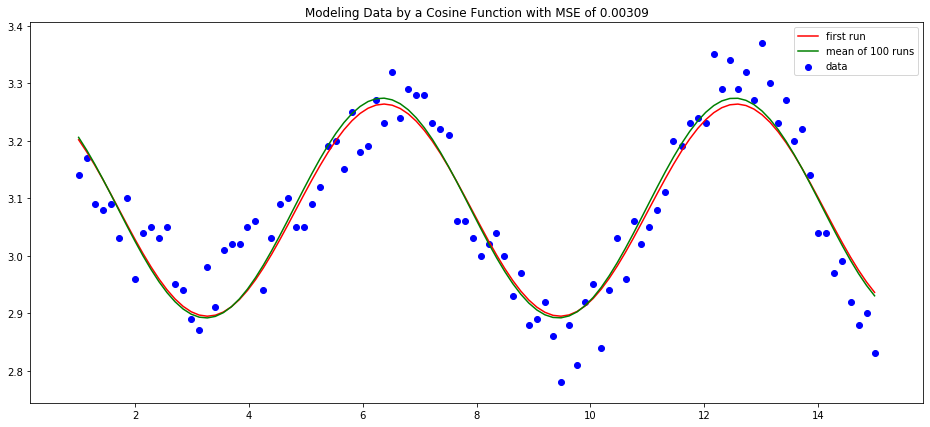

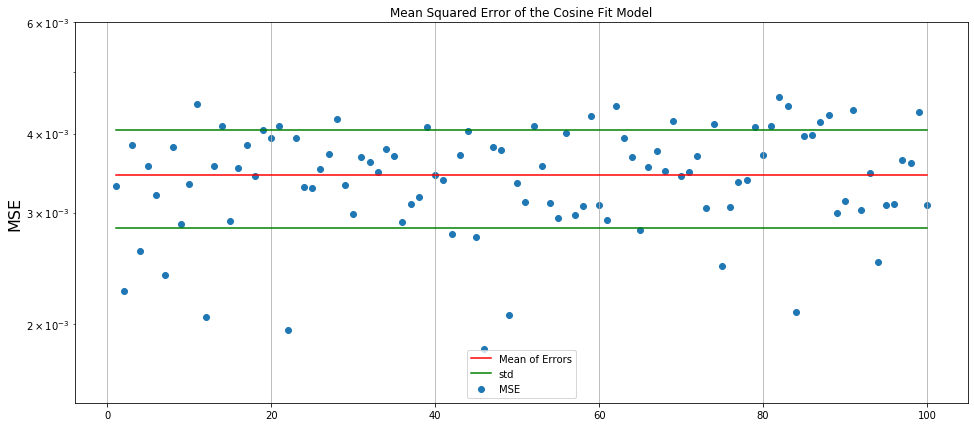

In [51]:
# part (E) 

# graph with mean value of parameters after 100 runs
x_val_2 = np.linspace(x.min(), x.max(), len(x))
y_val_2 = curve(x_val_2, np.mean(a), np.mean(b), np.mean(c), np.mean(d))
plt.plot(x_val, y_val, color='red', label='first run')             # plot both graphs
plt.plot(x_val_2, y_val_2, color='green', label='mean of 100 runs')
plt.scatter(x, y, color='blue', label='data')
plt.title('Modeling Data by a Cosine Function with MSE of {:.5f}'.format(mse))
plt.legend()
plt.gcf().set_size_inches(16,7)
plt.show()

# graph mean and standard deviation of MSE
plt.scatter(np.linspace(1,100,100), errors_cosine, label = "MSE")
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2), color='r', label="Mean of Errors")
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2)+std_cosine, color='green', label="std")
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2)-std_cosine, color='green')
plt.title('Mean Squared Error of the Cosine Fit Model')
plt.legend(loc = 'lower center')
plt.xlabel("",fontsize=16)
plt.ylabel("MSE",fontsize=16)
plt.ylim(1.5*10**-3,6*10**-3)
plt.grid()
plt.yscale('log')
plt.gcf().set_size_inches(16,7)
plt.show()

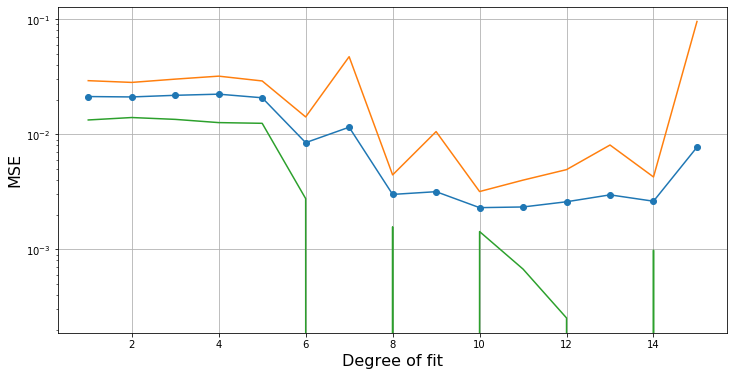

In [52]:
# Polynomial fit recap. Get and compare MSE of polynomial fit

# Train and Test stuff from previous day. Get degrees and coeffs for polynomial fit
def fit_a_polynomial(X,Y,degree):
    x_train, x_test, y_train, y_test = train_test_split(X,Y)
    fit = np.polyfit(x_train, y_train, degree)
    y_predicted = np.polyval(fit, x_test)
    mse = mean_squared_error(y_test, y_predicted)
    return(mse)

degree_errors_list = [list() for i in range(15)] # 15 degrees
MSE_polyn = 0.0
# for loop to run 100 time the function for every degree from 1 to 15
for degree in range(len(degree_errors_list)):
    for i in range(100):
        MSE_polyn = fit_a_polynomial(x, y, degree)
        degree_errors_list[degree].append(MSE_polyn) # 100 runs per 15 degrees

means = []
sigmas = []
for i in range(len(degree_errors_list)): # 15 degrees (len = 15)
    means.append(np.mean(degree_errors_list[i]))
    sigmas.append(np.std(degree_errors_list[i]))

degrees = list(range(1,16))

# plot main graph
plt.plot(degrees,means,marker="o")
plt.plot(degrees,np.array(means)+2*np.array(sigmas))
plt.plot(degrees,np.array(means)-2*np.array(sigmas))
#plt.ylim(0,100) this may be used to scale graph by y axes
plt.grid()
plt.xlabel("Degree of fit",fontsize=16)
plt.ylabel("MSE",fontsize=16)
plt.yscale('log')
plt.gcf().set_size_inches(12,6)
plt.show()

# get MSE to compare
mean_error_polynomial = np.mean(degree_errors_list[10]) # assume 10 is the best fit
sigma_polynomial = np.std(degree_errors_list[10])

In [53]:
print("Error for cosine fit: ", MSE_cosine)
print("Error for polynomial fit: ", MSE_polyn)

Error for cosine fit:  0.00344400493959309
Error for polynomial fit:  0.0018390236774366575


Seems like polynomial fit has less error then cosine

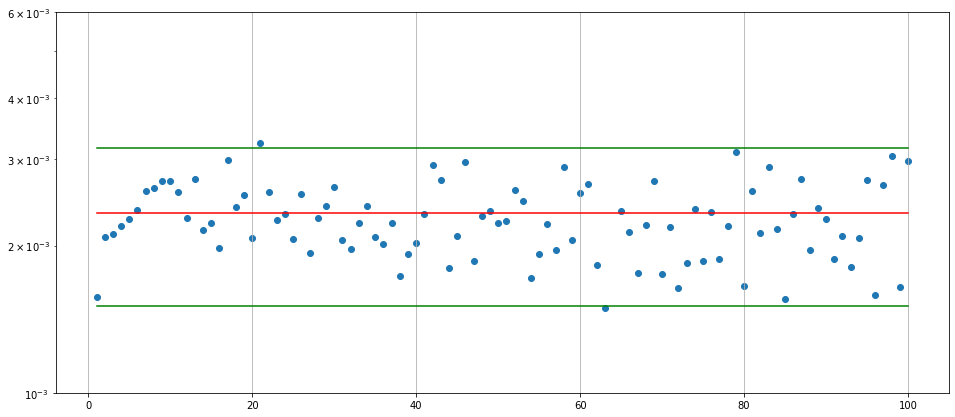

In [54]:
# graph mean and standard deviation of MSE for polynomial function
plt.scatter(np.linspace(1,100,100), degree_errors_list[10], label = "MSE")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2), color='r', label="Mean of Errors")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2)+np.array(sigma_polynomial),color='green', label="std")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2)-np.array(sigma_polynomial),color='green')
plt.ylim(1*10**-3,6*10**-3)
plt.grid()
plt.yscale('log')
plt.gcf().set_size_inches(16,7)
plt.show()

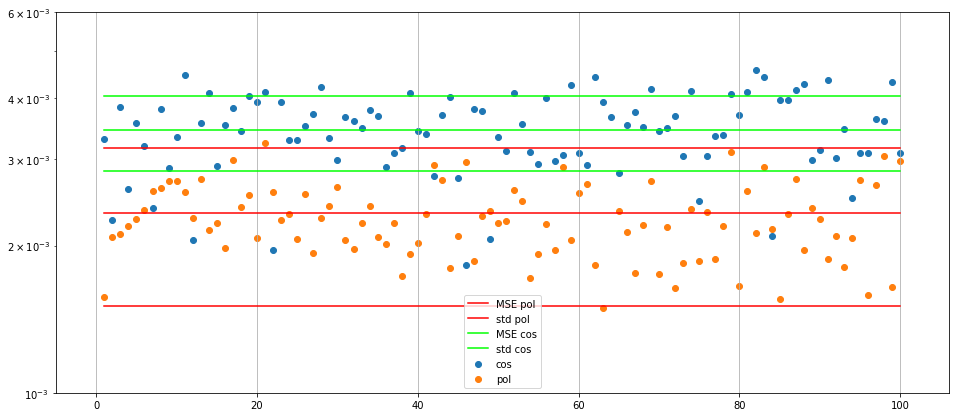

In [55]:
# compare errors for cosine and polynomial

plt.scatter(np.linspace(1,100,100), errors, label = "cos")
plt.scatter(np.linspace(1,100,100), degree_errors_list[10], label = "pol")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2), color='r', label="MSE pol")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2)+np.array(sigma_polynomial),color='r', label="std pol")
plt.plot(np.array([1,100]), np.array([mean_error_polynomial]*2)-np.array(sigma_polynomial),color='r')
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2), color='lime', label="MSE cos")
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2)+std_cosine, color='lime', label="std cos")
plt.plot(np.array([1,100]), np.array([MSE_cosine]*2)-std_cosine, color='lime')
plt.legend()
plt.ylim(1*10**-3,6*10**-3)
plt.grid()
plt.yscale('log')
plt.gcf().set_size_inches(16,7)
plt.show()


It honestly hard to disniguish difference in MSE between cosine and polynomial. But let's see how they looks like on a real graph!

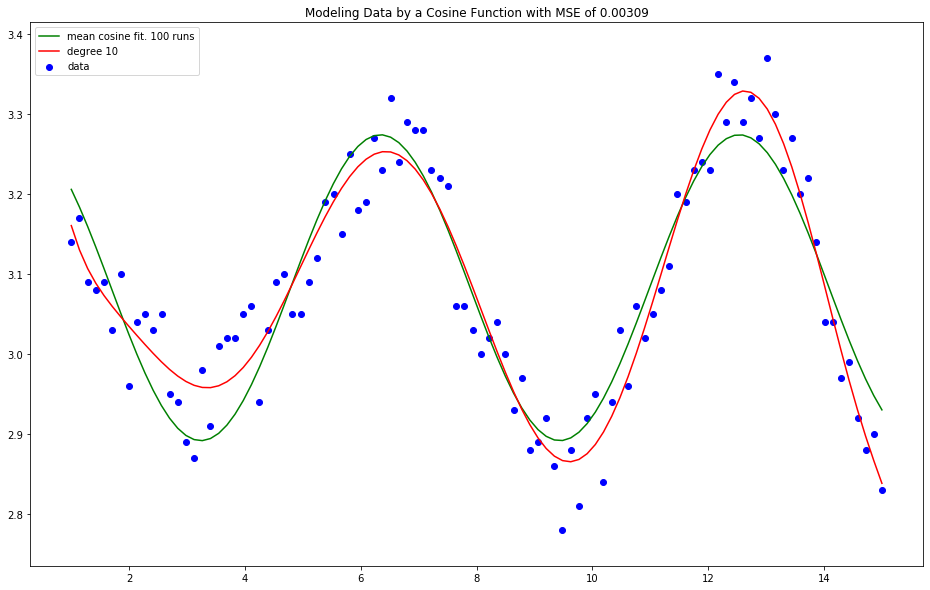

In [62]:
fit = np.polyfit(x, y, 10) # for now let's only print the best degree -> 10

yp = np.polyval(fit, xplot)

xplot = np.linspace(1,15,100)

yplot = curve(xplot, np.mean(a), np.mean(b), np.mean(c), np.mean(d))
#plt.plot(x, y, marker = "o")
plt.scatter(x, y, color='blue', label='data')
plt.plot(xplot, yplot, color='green', label='mean cosine fit. 100 runs')
plt.plot(xplot, yp, color='red', label = "degree " + str(10))
plt.title('Modeling Data by a Cosine Function with MSE of {:.5f}'.format(mse))
plt.legend()
plt.gcf().set_size_inches(16,10)
plt.show()


Let's see the MSEsagain

In [57]:
print("Error for cosine fit: ", MSE_cosine)
print("Error for polynomial fit: ", MSE_polyn)

Error for cosine fit:  0.00344400493959309
Error for polynomial fit:  0.0018390236774366575
